In [1]:
%matplotlib inline

import geopandas as gpd

import sys
sys.path.insert(0, "../")
from weavingspace import TileUnit
from weavingspace import Tiling

In [2]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

In [3]:
tile_unit = TileUnit(tiling_type = "hex-colouring", n = 7,
                     spacing = 300, crs = ak.crs).transform_rotate(45)

In [4]:
tiling = Tiling(tile_unit, ak, as_icons = True)

Initialising Tiling: 5.207955837249756e-06
Indexing the region: 0.05417050002142787
Forming the region union: 1.8243405423127115
Building the grid: 2.7750978749245405
Making the tiles: 0.3322348748333752
Indexing the tiles: 0.004368540830910206


In [5]:
tm = tiling.get_tiled_map()
tm.vars_to_map = [x for x in ak if "Rank" in x]
tm.colors_to_use = ("BrBG", "RdGy", "RdYlBu", "Spectral", 
                    "PiYG", "PRGn", "PuOr", "viridis")

No tile ids provided: setting all of them!
Setting defaults for the 'categoricals' attribute of the map.


<Axes: >

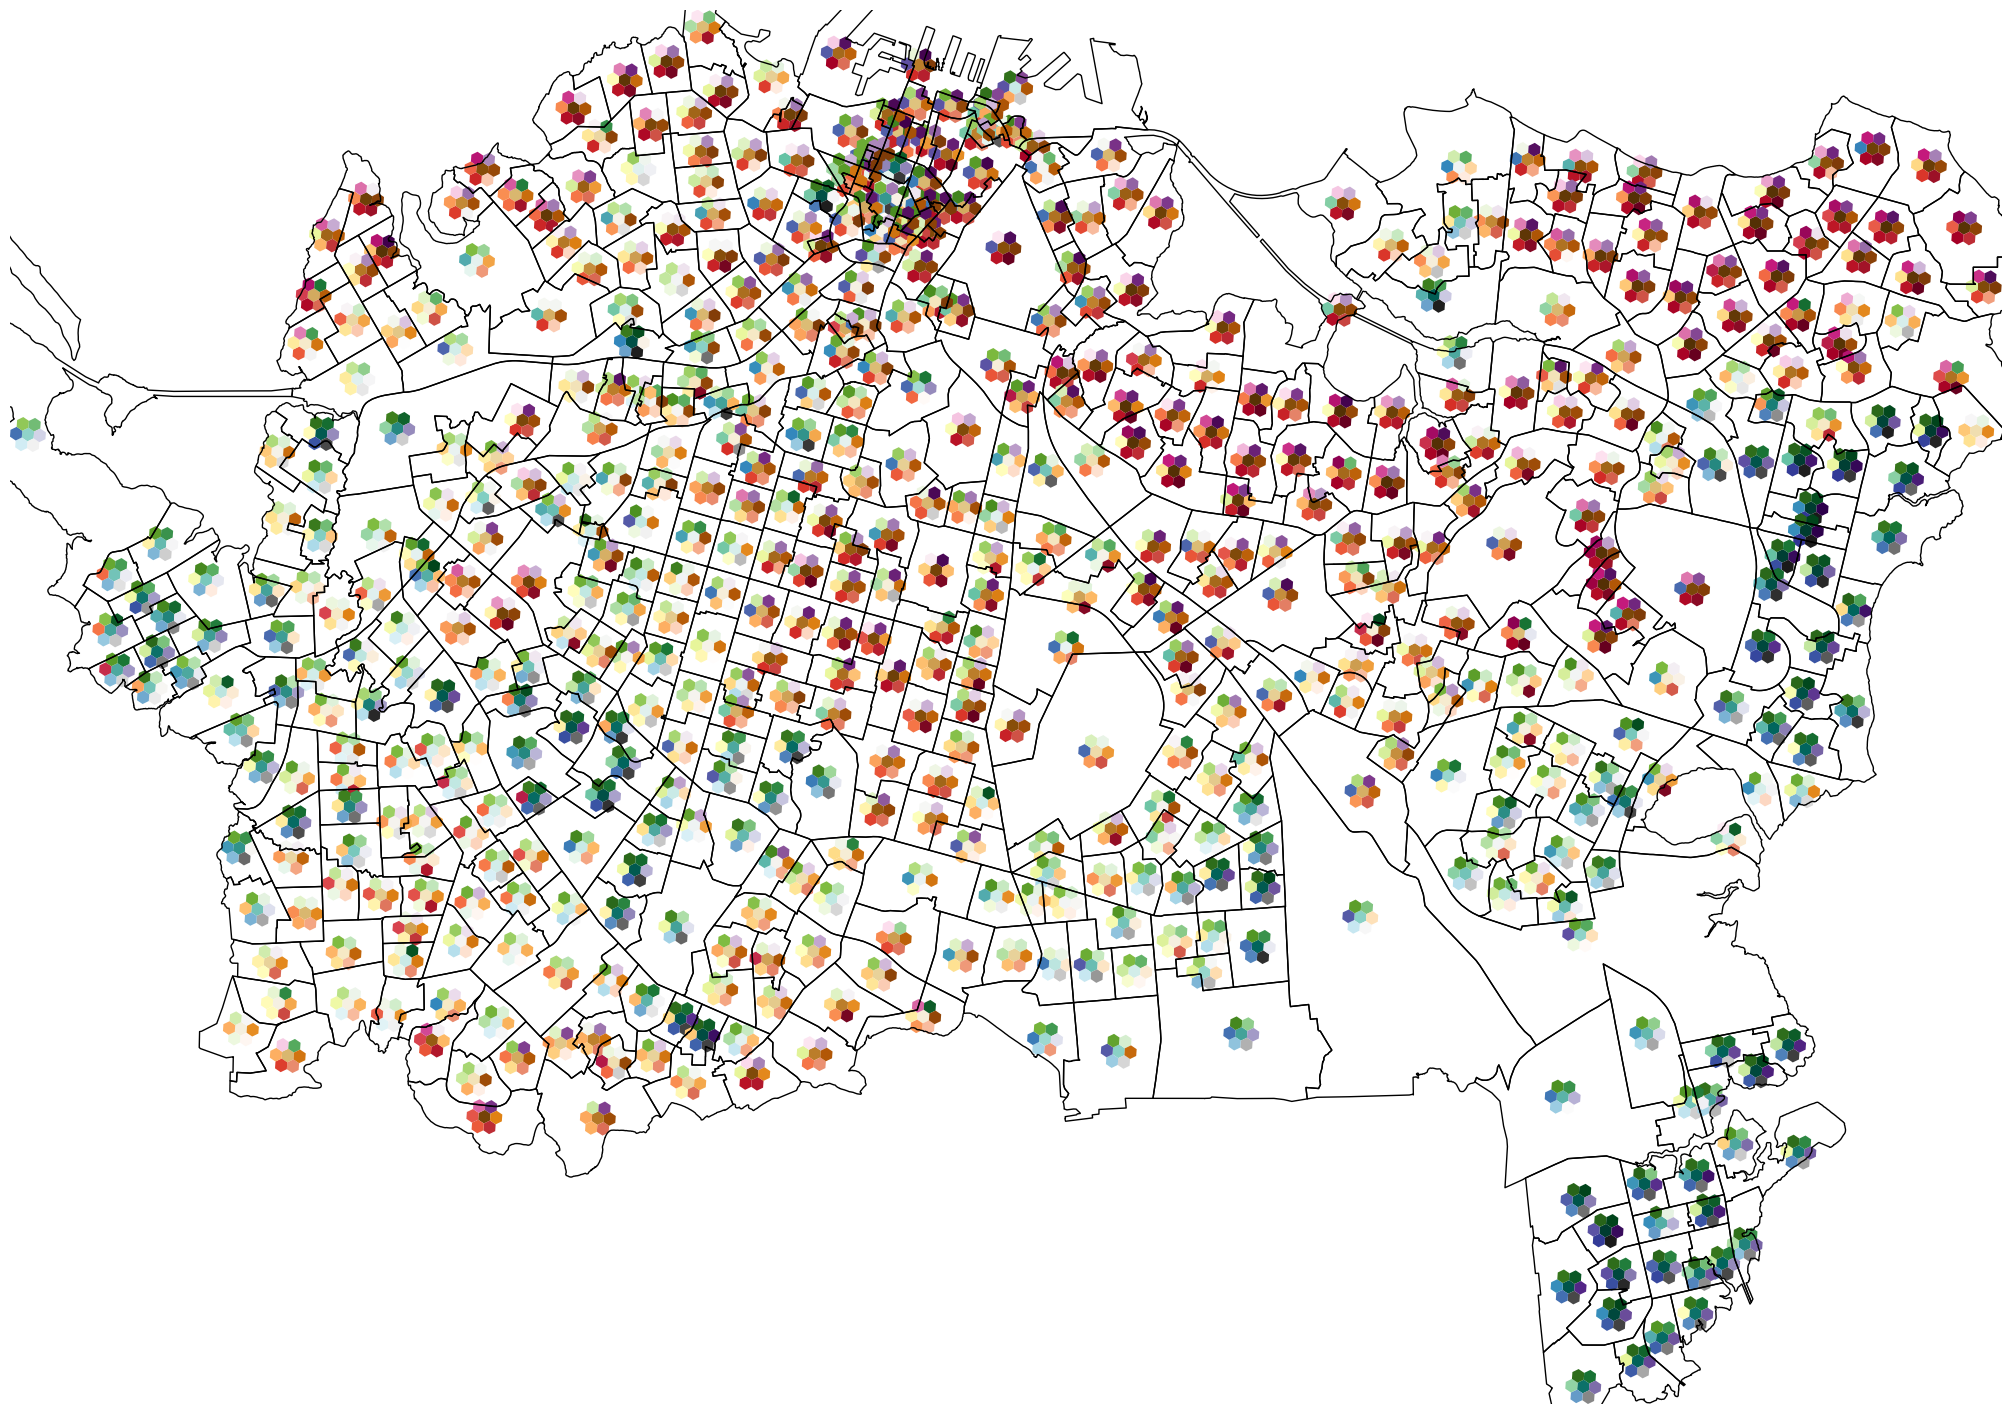

In [6]:
fig = tm.render(legend=False)
ak.plot(ax = fig.get_axes()[0], fc = "#00000000", ec = "k")